<div align="center">
    <span style="font-family: 'Lucida Calligraphy'; font-size: 70px; color:#560447;">TP2</span>
</div>
<br>

<div align="center">
    <span style="font-family: 'Lucida Calligraphy'; font-size: 30px; color: #F0F3F4;"> Les réseaux sémantiques</span>
</div>
<br><br>

<div align="left" style="font-family: 'Arial', sans-serif; color:#560447; font-size:18px;">
    <strong>Encadré par:</strong>
    <ul>
        <li style="color: white">Pr.Nidal LAMGHARI</li>
    </ul>
</div>

<div align="left" style="font-family: 'Arial', sans-serif; color:#560447; font-size: 18px;">
    <strong>Réalisé par :</strong>
    <ul>
        <li style="color: white">Bouzadi Chaima</li>
    </ul>
</div>

<div align="right" style="font-family: 'Arial', sans-serif; color: white; font-size: 16px;">
    <strong>Année :</strong> 2023/2024
</div>
<br><br><br>

<hr>
<br>

<div style="font-family: Arial, sans-serif; text-align: center; margin-bottom: 20px;">
    <h1 style="color: #560447; font-size: 36px; border-bottom: 2px solid #ccc; padding-bottom: 10px;">
        1ère Partie : Préparation de l’environnement et création du réseau
    </h1>
</div>


<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Construction d'un Réseau Sémantique des Entités Nommées</h2>
    <p>
       Dans cette partie, nous avons construit un réseau sémantique pour visualiser les relations entre les entités nommées extraites d'un texte. À l'aide de spaCy, nous avons identifié des entités comme des personnes et des organisations, puis, pour chaque phrase, nous avons relié les entités apparaissant ensemble. Ce réseau a été représenté sous forme de graphe avec `networkx` et `matplotlib`, où chaque nœud représente une entité et chaque lien indique une relation par co-occurrence dans le texte. Cette approche nous permet de mieux visualiser et analyser les liens entre les entités.
    </p>
</div>

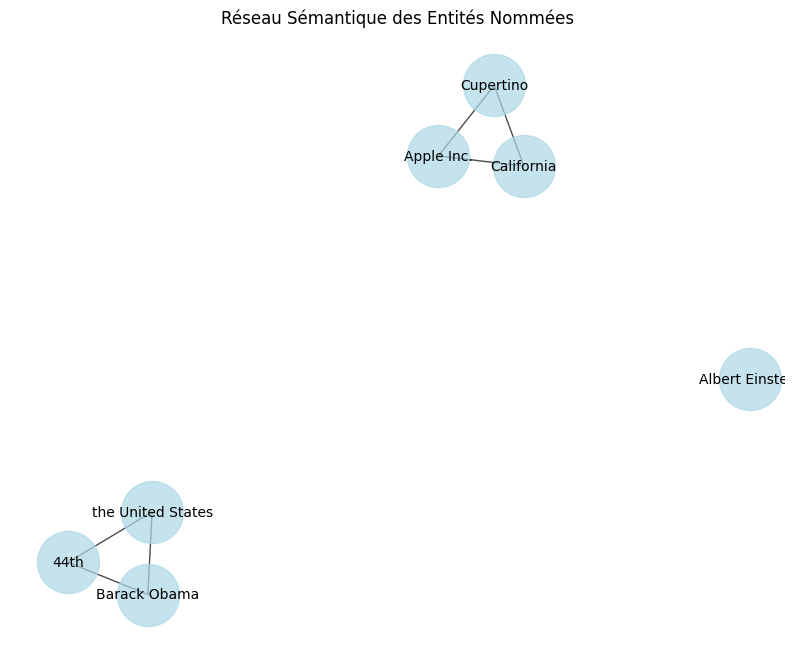

In [1]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Charger le modèle de spaCy
nlp = spacy.load("en_core_web_sm")

# 2. Exemple de texte pour l'analyse 
text = """
Albert Einstein was a theoretical physicist who developed the theory of relativity.
Apple Inc. is a major technology company headquartered in Cupertino, California.
Barack Obama was the 44th President of the United States.
"""
doc = nlp(text)



# Extraire les entités nommées et leurs relations
entities = []
relations = []
for sentence in doc.sents:
 ents_in_sentence = [ent.text for ent in sentence.ents]
 entities.extend(ents_in_sentence)
 # Créer des relations par co-occurrence dans la même phrase
 for ent1, ent2 in combinations(ents_in_sentence, 2):
   relations.append((ent1, ent2))
# Supprimer les doublons
entities = list(set(entities))
relations = list(set(relations))

# Créer un graphe non orienté
G = nx.Graph()
# Ajouter les entités en tant que nœuds
G.add_nodes_from(entities)
# Ajouter les relations en tant qu'arêtes
G.add_edges_from(relations)



# Visualisation du graphe
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Positionnement des nœuds
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Réseau Sémantique des Entités Nommées")
plt.axis('off')
plt.show()


## code chat

Entités extraites : ['Apple Inc.', 'Barack Obama', '44th', 'Cupertino', 'Albert Einstein', 'the United States', 'California']
Relations extraites : [('Apple Inc.', 'Cupertino'), ('44th', 'the United States'), ('Barack Obama', '44th'), ('Barack Obama', 'the United States'), ('Cupertino', 'California'), ('Apple Inc.', 'California')]


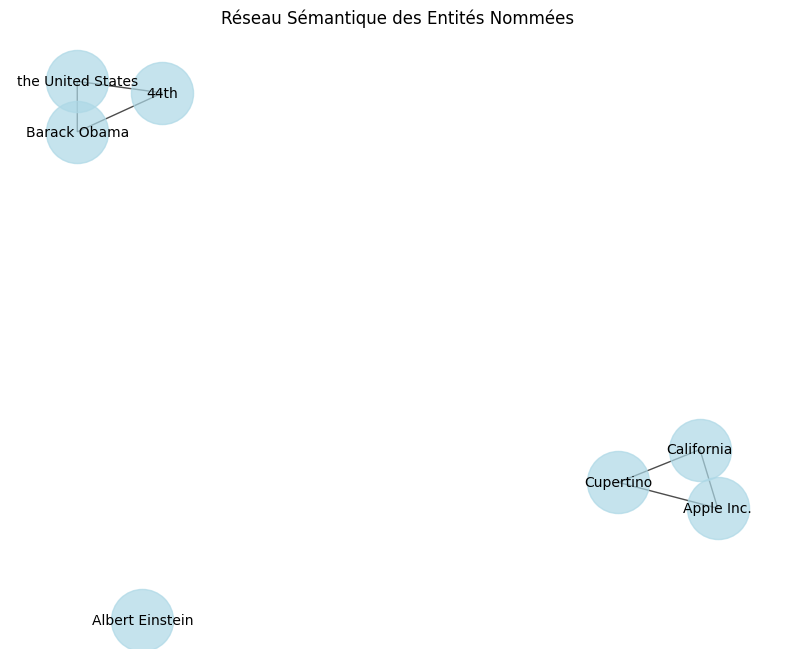

Centralité des nœuds:
Apple Inc.: 0.33
Barack Obama: 0.33
44th: 0.33
Cupertino: 0.33
Albert Einstein: 0.00
the United States: 0.33
California: 0.33
Communautés détectées:
Communauté Apple Inc.: 0
Communauté Barack Obama: 1
Communauté 44th: 1
Communauté Cupertino: 0
Communauté Albert Einstein: 2
Communauté the United States: 1
Communauté California: 0


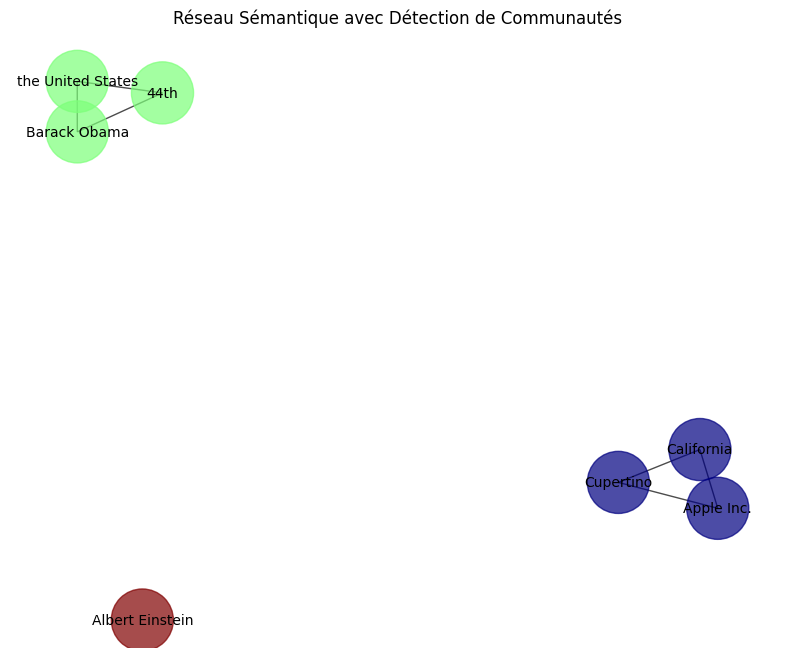

In [2]:
import spacy  # Pour le traitement du langage naturel
import networkx as nx  # Pour la création et manipulation de graphes
import matplotlib.pyplot as plt  # Pour la visualisation des graphes
from itertools import combinations  # Pour générer toutes les paires d'entités
import community as community_louvain  # Pour la détection de communautés

# 1. Charger le modèle spaCy
nlp = spacy.load("en_core_web_md")  # Charger le modèle spaCy en anglais

# 2. Exemple de texte pour l'analyse 
text = """
Albert Einstein was a theoretical physicist who developed the theory of relativity.
Apple Inc. is a major technology company headquartered in Cupertino, California.
Barack Obama was the 44th President of the United States.
"""

# 3. Appliquer spaCy pour analyser le texte
doc = nlp(text)

# 4. Extraire les entités et établir des relations
entities = []  # Liste pour stocker les entités extraites
relations = []  # Liste pour stocker les relations entre les entités

# Parcourir chaque phrase du texte
for sentence in doc.sents:
    # Extraire les entités de la phrase
    ents_in_sentence = [ent.text for ent in sentence.ents]
    
    # Ajouter les entités à la liste
    entities.extend(ents_in_sentence)

    # Créer des relations entre toutes les paires d'entités co-occurrant dans la même phrase
    for ent1, ent2 in combinations(ents_in_sentence, 2):
        relations.append((ent1, ent2))  # Ajouter la relation entre ent1 et ent2

# Supprimer les doublons dans les listes
entities = list(set(entities))
relations = list(set(relations))

# Afficher les entités et relations extraites
print("Entités extraites :", entities)
print("Relations extraites :", relations)

# 5. Créer un graphe non orienté avec NetworkX
G = nx.Graph()

# Ajouter les entités comme nœuds
G.add_nodes_from(entities)

# Ajouter les relations comme arêtes entre les nœuds
G.add_edges_from(relations)

# 6. Visualisation du graphe avec matplotlib
plt.figure(figsize=(10, 8))  # Taille du graphique

# Positionner les nœuds avec un algorithme "spring" (disposition naturelle)
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Dessiner les nœuds du graphe avec des couleurs et tailles spécifiques
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.7)

# Dessiner les arêtes entre les nœuds
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)

# Ajouter les étiquettes des nœuds (nom des entités)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Ajouter un titre au graphique
plt.title("Réseau Sémantique des Entités Nommées")

# Désactiver les axes pour une présentation plus propre
plt.axis('off')

# Afficher le graphique
plt.show()

# 7. Analyser la centralité des nœuds (quelques entités sont-elles plus centrales ?)
centrality = nx.degree_centrality(G)
print("Centralité des nœuds:")
for node, centrality_value in centrality.items():
    print(f"{node}: {centrality_value:.2f}")

# 8. Détection de communautés via l'algorithme Louvain
if len(G.nodes) > 1:  # Vérifier qu'il y a suffisamment de nœuds pour détecter des communautés
    partition = community_louvain.best_partition(G)  # Appliquer l'algorithme Louvain

    # Afficher les communautés détectées
    print("Communautés détectées:")
    for community, nodes in partition.items():
        print(f"Communauté {community}: {nodes}")

    # Visualisation des communautés avec des couleurs distinctes
    plt.figure(figsize=(10, 8))  # Taille du graphique
    colors = [partition[node] for node in G.nodes()]  # Assigner une couleur par communauté

    # Dessiner les nœuds avec leur couleur respective
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=colors, cmap=plt.cm.jet, alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Ajouter un titre pour la visualisation des communautés
    plt.title("Réseau Sémantique avec Détection de Communautés")

    # Désactiver les axes
    plt.axis('off')

    # Afficher le graphique
    plt.show()
else:
    print("Pas assez de nœuds pour détecter des communautés.")


<div style="font-family: Arial, sans-serif; text-align: center; margin-bottom: 20px;">
    <h1 style="color: #560447; font-size: 36px; border-bottom: 2px solid #ccc; padding-bottom: 10px;">
       2ème Partie : Système flou pour le contrôle de température
    </h1>
</div>

## Question 1


<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Utilisation d'un corpus plus large</h2>
    <p>
       
L' objectif ici est de créer un réseau sémantique à partir des entités nommées extraites dans le texte , puis de trouver leurs relations une fois qu'elles coexistent dans la même phrase . Nous allons représenter les entités et leurs relations sous forme de graphe non orienté par NetworkX et le visualiser avec Matplotlib. Enfin , nous appliquons l' algorithme de détection de communauté de Louvain afin de regrouper les entités en communautés en fonction de leur relation. De cette manière , cette visualisation finale de la visualisation montrera les entités interdépendantes , tout en déterminant les structures communautaires du réseau .
    </p>
</div>





Entités extraites : ['iCloud', 'Obama', 'Obamacare', 'the Institute for Advanced Study', 'the Obama Foundation', 'the App Store', 'Steve Wozniak', 'one', 'Elon Musk', 'California', 'Today', 'Apple Inc.', 'Apple', 'U.S.', 'Princeton', '2017', 'the Paris Agreement', 'African-American', 'Cupertino', 'Albert Einstein', 'the Nobel Prize in Physics', 'first', 'the Affordable Care Act', 'the Nobel Peace Prize', 'iPhone', 'Ronald Wayne', '1921', 'the Apple Watch', 'Apple Music', 'the United States', 'Tim Cook', 'Macintosh', 'MacBook', 'his later years', '1976', 'Jeff Bezos', 'the Democratic Party', 'Americans', '2009', 'Barack Obama', '44th', 'two', 'Steve Jobs', 'Einstein', 'iPad', 'New Jersey']
Relations extraites : [('the Institute for Advanced Study', 'New Jersey'), ('Obama', 'the Nobel Peace Prize'), ('Apple', 'Elon Musk'), ('Princeton', 'New Jersey'), ('Barack Obama', 'the United States'), ('Obama', 'first'), ('Apple Music', 'the App Store'), ('Today', 'Apple Music'), ('the Affordable Ca

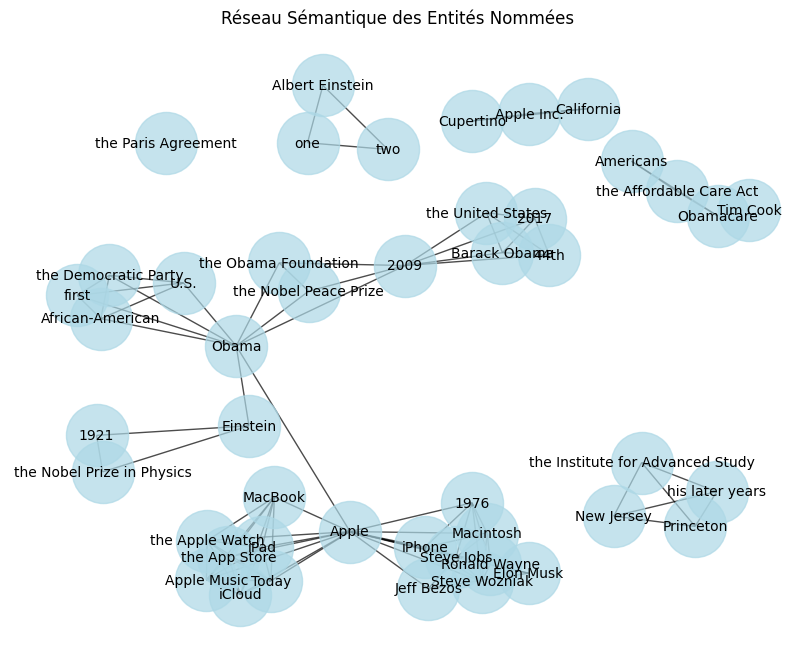

Centralité des nœuds:
iCloud: 0.16
Obama: 0.20
Obamacare: 0.04
the Institute for Advanced Study: 0.07
the Obama Foundation: 0.07
the App Store: 0.16
Steve Wozniak: 0.13
one: 0.04
Elon Musk: 0.07
California: 0.04
Today: 0.16
Apple Inc.: 0.04
Apple: 0.36
U.S.: 0.09
Princeton: 0.07
2017: 0.09
the Paris Agreement: 0.00
African-American: 0.09
Cupertino: 0.04
Albert Einstein: 0.04
the Nobel Prize in Physics: 0.04
first: 0.09
the Affordable Care Act: 0.04
the Nobel Peace Prize: 0.07
iPhone: 0.13
Ronald Wayne: 0.13
1921: 0.04
the Apple Watch: 0.16
Apple Music: 0.16
the United States: 0.09
Tim Cook: 0.00
Macintosh: 0.13
MacBook: 0.16
his later years: 0.07
1976: 0.13
Jeff Bezos: 0.07
the Democratic Party: 0.09
Americans: 0.04
2009: 0.16
Barack Obama: 0.09
44th: 0.09
two: 0.04
Steve Jobs: 0.18
Einstein: 0.07
iPad: 0.16
New Jersey: 0.07
Communautés détectées:
Communauté iCloud: 0
Communauté Obama: 1
Communauté Obamacare: 2
Communauté the Institute for Advanced Study: 3
Communauté the Obama Foundat

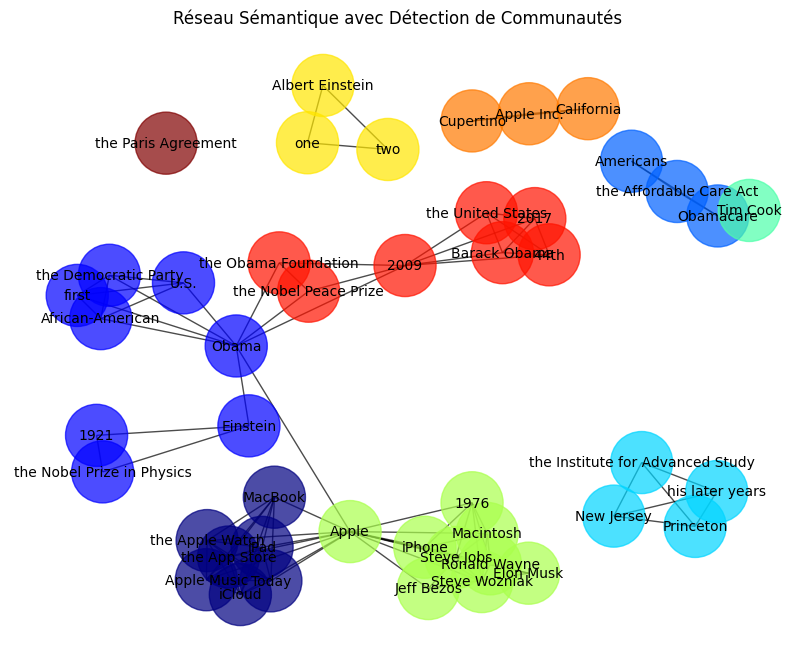

In [3]:
import spacy  # Pour le traitement du langage naturel
import networkx as nx  # Pour la création et manipulation de graphes
import matplotlib.pyplot as plt  # Pour la visualisation des graphes
from itertools import combinations  # Pour générer toutes les paires d'entités
import community as community_louvain  # Pour la détection de communautés

# 1. Charger le modèle spaCy
nlp = spacy.load("en_core_web_md")  # Charger le modèle spaCy en anglais

# 2. Exemple de texte pour l'analyse 
text = """
Albert Einstein was a theoretical physicist who developed the theory of relativity, one of the two pillars of modern physics, alongside quantum mechanics. His work on the equation E=mc², which demonstrates the equivalence of mass and energy, has had a profound impact on scientific research and technological advancements. Einstein was awarded the Nobel Prize in Physics in 1921 for his explanation of the photoelectric effect, which laid the foundation for quantum theory. He spent his later years at the Institute for Advanced Study in Princeton, New Jersey.

Apple Inc. is a major technology company headquartered in Cupertino, California. Founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976, Apple revolutionized the personal computing industry with the introduction of the Apple II, Macintosh, and later the iPhone, which changed the landscape of mobile technology. Today, Apple continues to innovate with products like the Apple Watch, iPad, and MacBook, as well as services such as Apple Music, iCloud, and the App Store. Tim Cook, the current CEO, has led the company to become one of the most valuable corporations globally.

Barack Obama was the 44th President of the United States, serving from 2009 to 2017. A member of the Democratic Party, Obama was the first African-American president in U.S. history. During his presidency, he signed into law the Affordable Care Act, commonly known as "Obamacare," which aimed to make healthcare more accessible to Americans. His administration also focused on renewable energy and the fight against climate change, as exemplified by the signing of the Paris Agreement. Obama was awarded the Nobel Peace Prize in 2009 and continues to be active in public life through the Obama Foundation.

Additionally, Einstein's work influenced the development of nuclear energy, while Obama emphasized nuclear disarmament during his presidency. Both Apple and Obama have been vocal on topics like privacy, data security, and technology's impact on society. Furthermore, Steve Jobs, Apple's visionary co-founder, is often compared to other transformative leaders like Elon Musk and Jeff Bezos, who continue to shape the future of technology and space exploration.

"""

# 3. Appliquer spaCy pour analyser le texte
doc = nlp(text)

# 4. Extraire les entités et établir des relations
entities = []  # Liste pour stocker les entités extraites
relations = []  # Liste pour stocker les relations entre les entités

# Parcourir chaque phrase du texte
for sentence in doc.sents:
    # Extraire les entités de la phrase
    ents_in_sentence = [ent.text for ent in sentence.ents]
    
    # Ajouter les entités à la liste
    entities.extend(ents_in_sentence)

    # Créer des relations entre toutes les paires d'entités co-occurrant dans la même phrase
    for ent1, ent2 in combinations(ents_in_sentence, 2):
        relations.append((ent1, ent2))  # Ajouter la relation entre ent1 et ent2

# Supprimer les doublons dans les listes
entities = list(set(entities))
relations = list(set(relations))

# Afficher les entités et relations extraites
print("Entités extraites :", entities)
print("Relations extraites :", relations)

# 5. Créer un graphe non orienté avec NetworkX
G = nx.Graph()

# Ajouter les entités comme nœuds
G.add_nodes_from(entities)

# Ajouter les relations comme arêtes entre les nœuds
G.add_edges_from(relations)

# 6. Visualisation du graphe avec matplotlib
plt.figure(figsize=(10, 8))  # Taille du graphique

# Positionner les nœuds avec un algorithme "spring" (disposition naturelle)
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Dessiner les nœuds du graphe avec des couleurs et tailles spécifiques
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.7)

# Dessiner les arêtes entre les nœuds
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)

# Ajouter les étiquettes des nœuds (nom des entités)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Ajouter un titre au graphique
plt.title("Réseau Sémantique des Entités Nommées")

# Désactiver les axes pour une présentation plus propre
plt.axis('off')

# Afficher le graphique
plt.show()

# 7. Analyser la centralité des nœuds (quelques entités sont-elles plus centrales ?)
centrality = nx.degree_centrality(G)
print("Centralité des nœuds:")
for node, centrality_value in centrality.items():
    print(f"{node}: {centrality_value:.2f}")

# 8. Détection de communautés via l'algorithme Louvain
if len(G.nodes) > 1:  # Vérifier qu'il y a suffisamment de nœuds pour détecter des communautés
    partition = community_louvain.best_partition(G)  # Appliquer l'algorithme Louvain

    # Afficher les communautés détectées
    print("Communautés détectées:")
    for community, nodes in partition.items():
        print(f"Communauté {community}: {nodes}")

    # Visualisation des communautés avec des couleurs distinctes
    plt.figure(figsize=(10, 8))  # Taille du graphique
    colors = [partition[node] for node in G.nodes()]  # Assigner une couleur par communauté

    # Dessiner les nœuds avec leur couleur respective
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=colors, cmap=plt.cm.jet, alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Ajouter un titre pour la visualisation des communautés
    plt.title("Réseau Sémantique avec Détection de Communautés")

    # Désactiver les axes
    plt.axis('off')

    # Afficher le graphique
    plt.show()
else:
    print("Pas assez de nœuds pour détecter des communautés.")


## Question 2



<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Exploration de Méthodes Avancées de Détection de Relations Basées sur les Dépendances Syntaxiques</h2>
    <p>
Dans ce code, nous analysons un texte pour extraire des entités et leurs relations syntaxiques, en utilisant spaCy pour le traitement du langage naturel. En nous basant sur les dépendances sujet-verbe-objet et les modificateurs associés aux entités, nous identifions les relations pertinentes entre elles. Ensuite, nous construisons un graphe sémantique à l'aide de NetworkX pour visualiser ces liens, ce qui nous permet d'explorer visuellement les connexions entre les entités dans le texte.
    </p>
</div>





Entités extraites : ['iCloud', 'Obama', 'Obamacare', 'the Institute for Advanced Study', 'the Obama Foundation', 'the App Store', 'Steve Wozniak', 'one', 'Elon Musk', 'California', 'Today', 'Apple Inc.', 'Apple', 'U.S.', 'Princeton', '2017', 'the Paris Agreement', 'African-American', 'Cupertino', 'Albert Einstein', 'the Nobel Prize in Physics', 'first', 'the Affordable Care Act', 'the Nobel Peace Prize', 'iPhone', 'Ronald Wayne', '1921', 'the Apple Watch', 'Apple Music', 'the United States', 'Tim Cook', 'Macintosh', 'MacBook', 'his later years', '1976', 'Jeff Bezos', 'the Democratic Party', 'Americans', '2009', 'Barack Obama', '44th', 'two', 'Steve Jobs', 'Einstein', 'iPad', 'New Jersey']
Relations basées sur les dépendances syntaxiques : [('Advanced', 'Study'), ('Tim', 'Cook'), ('Affordable', 'Care'), ('New', 'Jersey'), ('Apple', 'Music'), ('Barack', 'Obama'), ('Apple', 'Inc.'), ('African', 'American'), ('Paris', 'Agreement'), ('Care', 'Act'), ('Steve', 'Jobs'), ('Albert', 'Einstein')

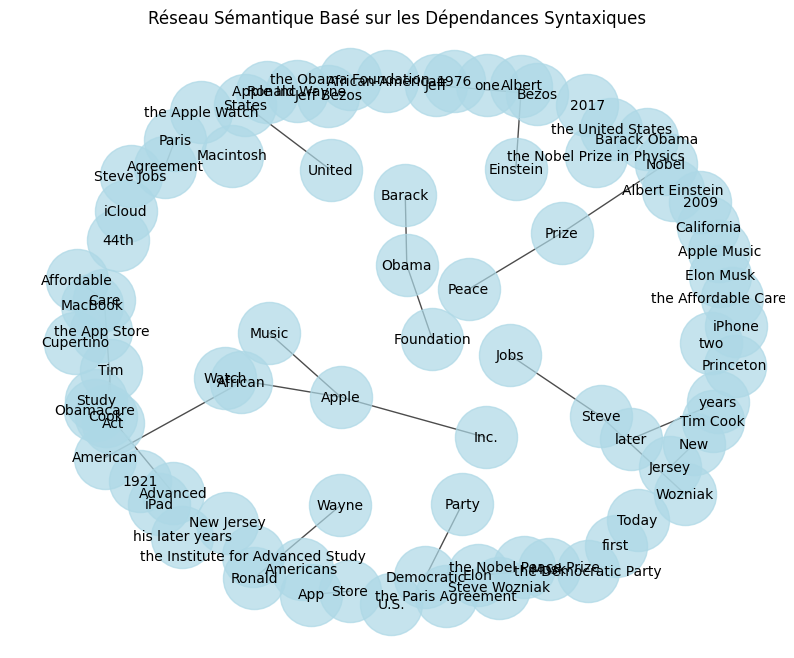

In [4]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Charger le modèle de langue anglaise de spaCy
nlp = spacy.load("en_core_web_md")

# Texte d'exemple élargi
text = """
Albert Einstein was a theoretical physicist who developed the theory of relativity, one of the two pillars of modern physics, alongside quantum mechanics. His work on the equation E=mc², which demonstrates the equivalence of mass and energy, has had a profound impact on scientific research and technological advancements. Einstein was awarded the Nobel Prize in Physics in 1921 for his explanation of the photoelectric effect, which laid the foundation for quantum theory. He spent his later years at the Institute for Advanced Study in Princeton, New Jersey.

Apple Inc. is a major technology company headquartered in Cupertino, California. Founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976, Apple revolutionized the personal computing industry with the introduction of the Apple II, Macintosh, and later the iPhone, which changed the landscape of mobile technology. Today, Apple continues to innovate with products like the Apple Watch, iPad, and MacBook, as well as services such as Apple Music, iCloud, and the App Store. Tim Cook, the current CEO, has led the company to become one of the most valuable corporations globally.

Barack Obama was the 44th President of the United States, serving from 2009 to 2017. A member of the Democratic Party, Obama was the first African-American president in U.S. history. During his presidency, he signed into law the Affordable Care Act, commonly known as "Obamacare," which aimed to make healthcare more accessible to Americans. His administration also focused on renewable energy and the fight against climate change, as exemplified by the signing of the Paris Agreement. Obama was awarded the Nobel Peace Prize in 2009 and continues to be active in public life through the Obama Foundation.

Additionally, Einstein's work influenced the development of nuclear energy, while Obama emphasized nuclear disarmament during his presidency. Both Apple and Obama have been vocal on topics like privacy, data security, and technology's impact on society. Furthermore, Steve Jobs, Apple's visionary co-founder, is often compared to other transformative leaders like Elon Musk and Jeff Bezos, who continue to shape the future of technology and space exploration.

"""

# Appliquer le modèle spaCy pour analyser le texte
doc = nlp(text)

# Listes pour stocker les entités et les relations syntaxiques
entities = []  # Pour stocker les entités extraites
relations = []  # Pour stocker les relations entre les entités

# Parcourir chaque phrase pour extraire les relations
for sentence in doc.sents:
    ents_in_sentence = [ent.text for ent in sentence.ents]  # Entités dans la phrase
    entities.extend(ents_in_sentence)  # Ajouter à la liste globale des entités

    # Parcourir les tokens pour identifier les relations de dépendance syntaxique
    for token in sentence:
        # Détection des relations Sujet-Verbe-Objet
        if token.dep_ == "nsubj" and token.head.dep_ == "ROOT":
            subject = token.text
            verb = token.head.text
            obj = None
            
            # Rechercher un objet direct lié au verbe principal
            for child in token.head.children:
                if child.dep_ == "dobj":
                    obj = child.text
                    break

            # Si on a trouvé sujet et objet dans la même phrase
            if subject in ents_in_sentence and obj in ents_in_sentence:
                relations.append((subject, obj))
        
        # Détection des modificateurs de nom et des adjectifs liés aux entités
        if token.dep_ in {"amod", "compound"} and token.head.ent_type_:
            modifier = token.text
            entity = token.head.text
            relations.append((modifier, entity))

# Supprimer les doublons dans les entités et relations
entities = list(set(entities))
relations = list(set(relations))

# Afficher les entités et les relations détectées
print("Entités extraites :", entities)
print("Relations basées sur les dépendances syntaxiques :", relations)

# Création du graphe avec NetworkX
G = nx.Graph()
G.add_nodes_from(entities)  # Ajouter les entités comme nœuds
G.add_edges_from(relations)  # Ajouter les relations comme arêtes

# Visualiser le graphe
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)  # Position des nœuds
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Réseau Sémantique Basé sur les Dépendances Syntaxiques")
plt.axis("off")
plt.show()



## Question 3


<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Appliquation d'une mesure de similarité pour connecter les concepts liés sémantiquement
mais non explicitement co-mentionnés.</h2>
    <p>
Dans ce code, nous construisons un réseau sémantique en utilisant spaCy pour analyser des entités extraites d'un texte. Nous comparons chaque paire d'entités en mesurant la similarité de leurs vecteurs de mots, et ajoutons des liens entre elles si leur similarité dépasse un seuil défini. Ce processus nous permet de visualiser des relations conceptuelles entre entités, illustrant ainsi les liens thématiques forts présents dans le texte. Enfin, nous utilisons NetworkX pour afficher ce réseau, avec des labels indiquant le niveau de similarité pour chaque relation, offrant ainsi une vue intuitive de la proximité sémantique des entités.
    </p>
</div>


Entités extraites : ['iCloud', 'Obama', 'Obamacare', 'the Institute for Advanced Study', 'the Obama Foundation', 'the App Store', 'Steve Wozniak', 'one', 'Elon Musk', 'California', 'Today', 'Apple Inc.', 'Apple', 'U.S.', 'Princeton', '2017', 'the Paris Agreement', 'African-American', 'Cupertino', 'Albert Einstein', 'the Nobel Prize in Physics', 'first', 'the Affordable Care Act', 'the Nobel Peace Prize', 'iPhone', 'Ronald Wayne', '1921', 'the Apple Watch', 'Apple Music', 'the United States', 'Tim Cook', 'Macintosh', 'MacBook', 'his later years', '1976', 'Jeff Bezos', 'the Democratic Party', 'Americans', '2009', 'Barack Obama', '44th', 'two', 'Steve Jobs', 'Einstein', 'iPad', 'New Jersey']
Relations basées sur la similarité :
Obama - Obamacare : Similarité = 1.00
Obama - the Obama Foundation : Similarité = 0.61
Obama - Barack Obama : Similarité = 0.89
Obamacare - the Obama Foundation : Similarité = 0.61
Obamacare - Barack Obama : Similarité = 0.89
the Institute for Advanced Study - the 

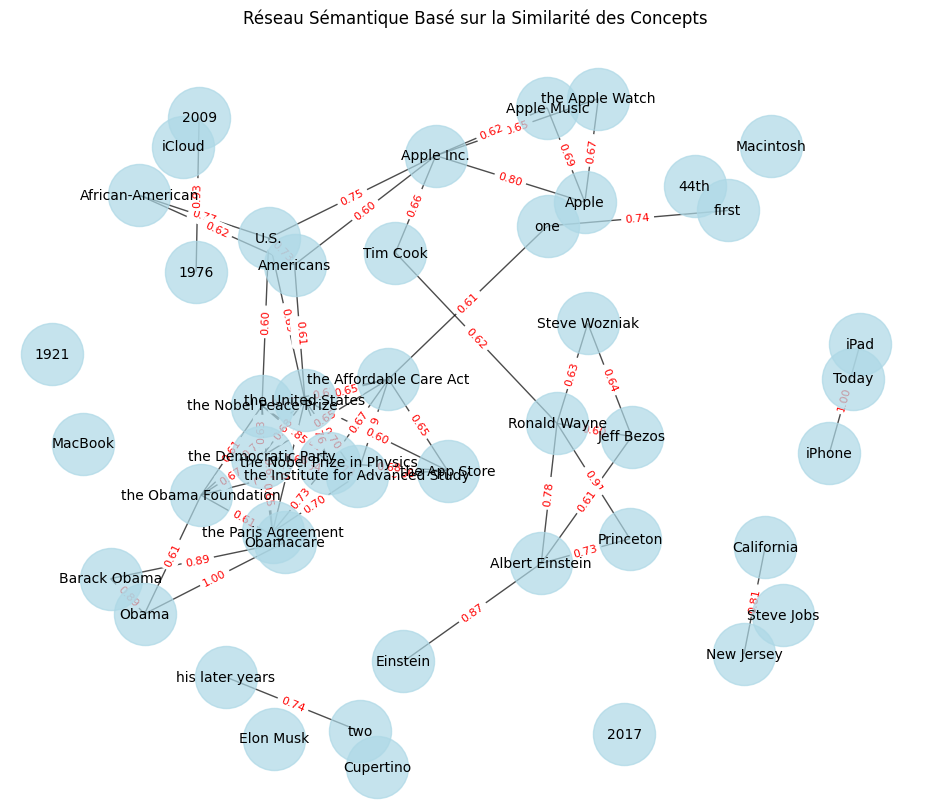

In [5]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Charger le modèle de langue anglaise de spaCy avec des vecteurs de mots
nlp = spacy.load("en_core_web_md")

# Texte d'exemple élargi
text = """
Albert Einstein was a theoretical physicist who developed the theory of relativity, one of the two pillars of modern physics, alongside quantum mechanics. His work on the equation E=mc², which demonstrates the equivalence of mass and energy, has had a profound impact on scientific research and technological advancements. Einstein was awarded the Nobel Prize in Physics in 1921 for his explanation of the photoelectric effect, which laid the foundation for quantum theory. He spent his later years at the Institute for Advanced Study in Princeton, New Jersey.

Apple Inc. is a major technology company headquartered in Cupertino, California. Founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976, Apple revolutionized the personal computing industry with the introduction of the Apple II, Macintosh, and later the iPhone, which changed the landscape of mobile technology. Today, Apple continues to innovate with products like the Apple Watch, iPad, and MacBook, as well as services such as Apple Music, iCloud, and the App Store. Tim Cook, the current CEO, has led the company to become one of the most valuable corporations globally.

Barack Obama was the 44th President of the United States, serving from 2009 to 2017. A member of the Democratic Party, Obama was the first African-American president in U.S. history. During his presidency, he signed into law the Affordable Care Act, commonly known as "Obamacare," which aimed to make healthcare more accessible to Americans. His administration also focused on renewable energy and the fight against climate change, as exemplified by the signing of the Paris Agreement. Obama was awarded the Nobel Peace Prize in 2009 and continues to be active in public life through the Obama Foundation.

Additionally, Einstein's work influenced the development of nuclear energy, while Obama emphasized nuclear disarmament during his presidency. Both Apple and Obama have been vocal on topics like privacy, data security, and technology's impact on society. Furthermore, Steve Jobs, Apple's visionary co-founder, is often compared to other transformative leaders like Elon Musk and Jeff Bezos, who continue to shape the future of technology and space exploration.

"""

# Appliquer le modèle spaCy pour analyser le texte
doc = nlp(text)

# Extraire les entités du texte
entities = list(set([ent.text for ent in doc.ents]))

# Initialiser le graphe
G = nx.Graph()
G.add_nodes_from(entities)

# Définir un seuil de similarité (ajustable)
similarity_threshold = 0.6

# Calculer la similarité entre chaque paire d'entités
for ent1, ent2 in combinations(entities, 2):
    # Convertir les entités en objets spaCy pour obtenir les vecteurs
    span1 = nlp(ent1)
    span2 = nlp(ent2)
    
    # Calculer la similarité de similarité entre les vecteurs de chaque paire d'entités
    similarity = span1.similarity(span2)
    
    # Ajouter une arête si la similarité dépasse le seuil
    if similarity >= similarity_threshold:
        G.add_edge(ent1, ent2, weight=similarity)

# Afficher les entités et les relations basées sur la similarité
print("Entités extraites :", entities)
print("Relations basées sur la similarité :")
for (ent1, ent2, weight) in G.edges(data="weight"):
    print(f"{ent1} - {ent2} : Similarité = {weight:.2f}")

# Visualiser le graphe avec les similarités
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Ajouter des labels aux arêtes pour indiquer les similarités
edge_labels = {(ent1, ent2): f"{weight:.2f}" for (ent1, ent2, weight) in G.edges(data="weight")}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="red")

plt.title("Réseau Sémantique Basé sur la Similarité des Concepts")
plt.axis("off")
plt.show()
